# LARGE SCALE WAVE ENERGY FARM

# overview
 # Wave energy is a rapidly advancing and promising renewable energy source that holds great potential for addressing the challenges of global warming and climate change. However, optimizing energy output in large wave farms presents a complex problem due to the expensive calculations required to account for hydrodynamic interactions between wave energy converters (WECs). Developing a fast and accurate surrogate model is crucial to overcome these challenges.

# Objective
 # The dataset consists of 36043 rows and 149 columns.

 # The columns include X and Y coordinates (e.g., X1, Y1, ..., X5, Y5), likely representing the positions of different WECs.

 # Power generation columns (e.g., Power42, Power43, ..., Power49) indicate the power output of various WECs.

 # The column Total_Power represents the overall power generated.

 # There is a column labeled qW, which might represent a wave parameter such as wave energy flux or water flow rate. 

# Insights
  # Basic statistics of power generation.

  # Distribution of total power output over time.

  # Correlation between WECs' power outputs to see how they interact.

# Data collection
 # UCI Machine Learnig Repository 

In [9]:
# Data cleanig and EDA

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
data=pd.read_csv('large-scale+wave+energy+farm.csv')

In [15]:
df=pd.DataFrame(data)

In [17]:
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [19]:
df.tail()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
36038,100.0,250.0,250.0,250.0,300.0,200.0,400.0,100.0,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.0,150.0,350.0,200.0,700.0,500.0,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.0,100.0,350.0,500.0,750.0,200.0,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.0,350.0,1000.0,250.0,550.0,150.0,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64
36042,100.0,400.0,400.0,700.0,400.0,200.0,800.0,50.0,350.0,250.0,...,101467.79,97602.18,63219.97,90117.87,73152.07,99875.52,101412.65,76111.53,0.86,4057544.99


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB


In [23]:
df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04
mean,366.597060,18.709550,426.314033,51.085762,477.295590,57.846020,497.150488,73.323178,684.309548,44.012247,...,93678.772248,96530.68484,96666.293181,97007.214249,98466.265281,98106.278501,97462.663041,96134.920454,0.833849,3.938246e+06
std,307.911246,44.043295,265.781316,90.151852,270.322011,42.143917,279.631344,51.140816,237.862684,59.242702,...,7401.226140,6709.53446,7020.690028,4829.877255,4978.194259,4263.508074,3134.420742,3889.098339,0.026052,1.226171e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52516.130000,56391.97000,53877.360000,53050.330000,55401.380000,63028.260000,61717.310000,47257.430000,0.720000,3.388944e+06
25%,65.770000,0.000000,200.000000,0.000000,289.950000,50.000000,300.000000,50.000000,600.000000,0.000000,...,88177.210000,94648.08000,96932.520000,97612.350000,97629.940000,97154.630000,96869.740000,96319.550000,0.810000,3.847335e+06
50%,250.000000,0.000000,346.090000,37.520000,400.000000,74.820000,500.000000,100.000000,700.000000,0.080000,...,93694.540000,98729.91000,99269.310000,98857.150000,100423.930000,99805.920000,98710.730000,96543.090000,0.830000,3.931541e+06
75%,600.000000,0.000000,745.980000,37.900000,689.800000,74.960000,632.750000,112.150000,850.000000,50.000000,...,100997.520000,100622.52000,100282.360000,99156.130000,101370.970000,100955.350000,99064.495000,97036.300000,0.860000,4.063623e+06
max,1000.000000,885.590000,1000.000000,939.260000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,919.590000,...,110945.940000,109400.43000,114194.520000,106702.150000,104751.350000,102892.110000,102275.480000,101876.140000,0.880000,4.177659e+06


In [25]:
df.shape

(36043, 149)

In [27]:
df.columns

Index(['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5',
       ...
       'Power42', 'Power43', 'Power44', 'Power45', 'Power46', 'Power47',
       'Power48', 'Power49', 'qW', 'Total_Power'],
      dtype='object', length=149)

In [29]:
df.isnull().sum()

X1             0
Y1             0
X2             0
Y2             0
X3             0
              ..
Power47        0
Power48        0
Power49        0
qW             0
Total_Power    0
Length: 149, dtype: int64

In [31]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36038    False
36039    False
36040    False
36041    False
36042    False
Length: 36043, dtype: bool

In [33]:
df.duplicated().sum()

25107

In [35]:
df.drop_duplicates()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


In [37]:
num_cols=df.select_dtypes(include=['number'])
num_cols

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


In [39]:
# Outliers

<Axes: >

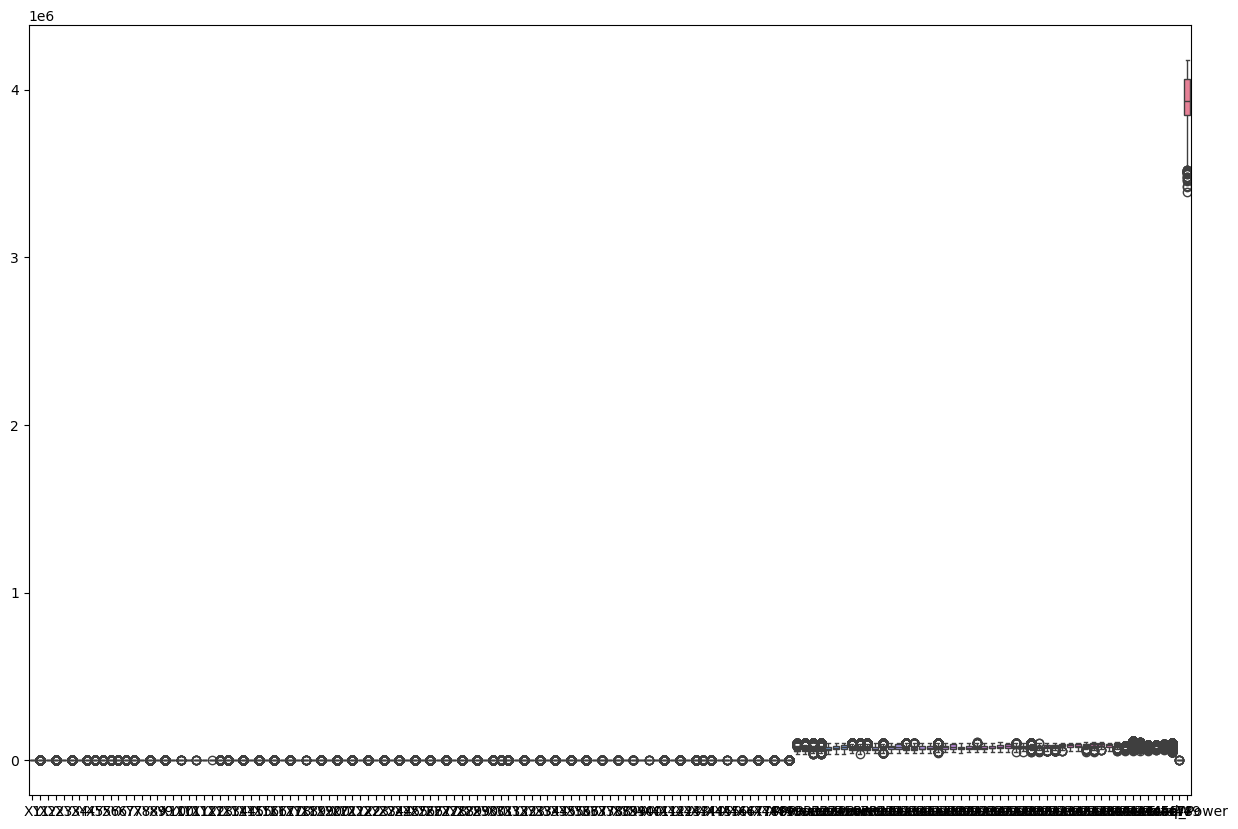

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

In [42]:
# Function to remove outliers using IQR method (capping)

In [43]:
def Handling_outliers(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)
        
        # capping outliers
        df[col] = df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)
    return df  

In [44]:
df1 = Handling_outliers(df)

<Axes: >

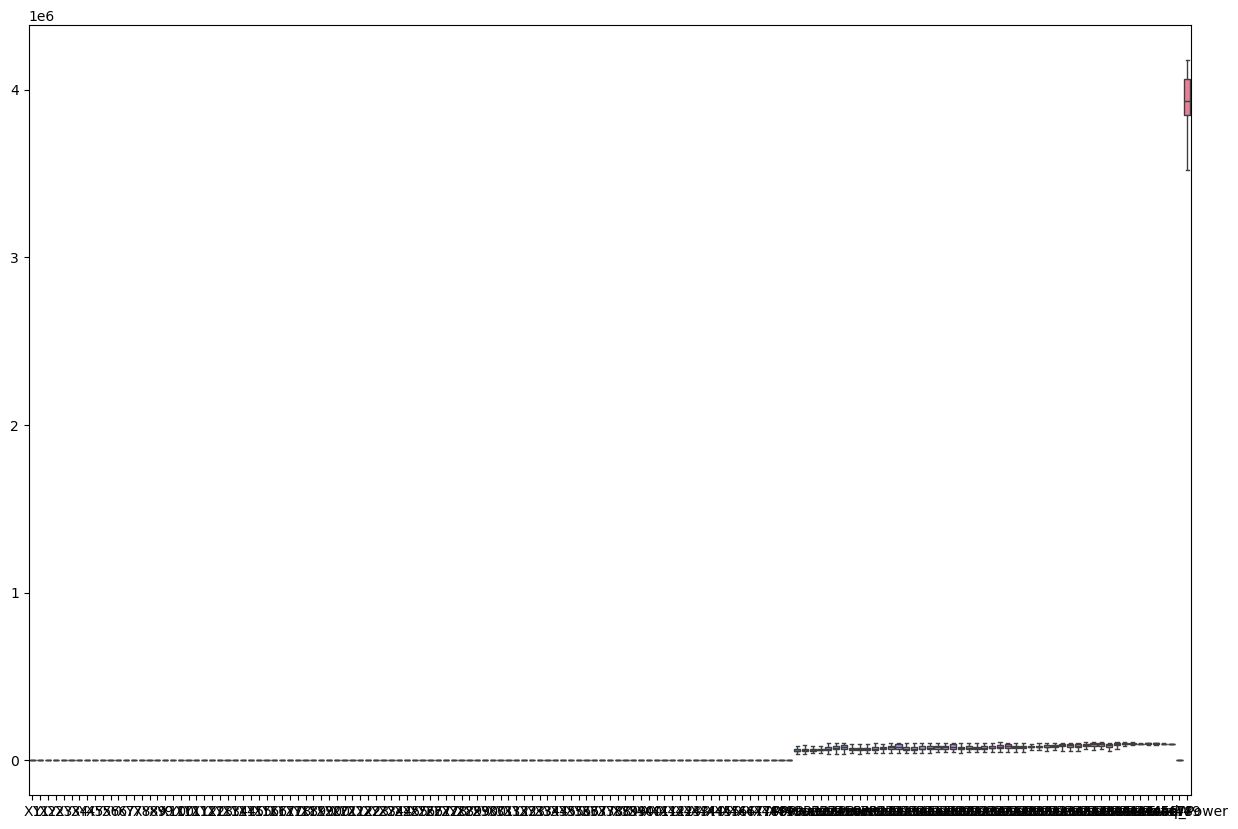

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(df1)

In [50]:
# Identify target variable

In [51]:
target_variable = 'Total_Power'

In [52]:
# handling skew

In [57]:
numerical_features = df1.select_dtypes(include = ['int64','float64']).columns

In [59]:
numerical_features = df1.select_dtypes(include=['number']).columns

In [63]:
df1[numerical_features].skew()

X1             0.538653
Y1             0.000000
X2             0.507752
Y2             0.599524
X3             0.330082
                 ...   
Power47       -1.182506
Power48       -1.197563
Power49        0.409201
qW            -0.243898
Total_Power   -0.242845
Length: 149, dtype: float64

In [65]:
df1.skew()

X1             0.538653
Y1             0.000000
X2             0.507752
Y2             0.599524
X3             0.330082
                 ...   
Power47       -1.182506
Power48       -1.197563
Power49        0.409201
qW            -0.243898
Total_Power   -0.242845
Length: 149, dtype: float64

In [67]:
skewness = df[numerical_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewness[abs(skewness) > 0.5].index

In [75]:
print(skewed_features)

Index(['X1', 'X2', 'Y2', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'Y8', 'X13',
       'Y13', 'X14', 'Y14', 'Y17', 'X19', 'X20', 'X21', 'X23', 'X27', 'X29',
       'X30', 'Y31', 'Y32', 'Y34', 'X36', 'X37', 'X38', 'Y39', 'X43', 'X44',
       'X48', 'Y48', 'Y49', 'Power1', 'Power2', 'Power4', 'Power5', 'Power8',
       'Power9', 'Power10', 'Power11', 'Power15', 'Power16', 'Power17',
       'Power18', 'Power22', 'Power23', 'Power24', 'Power25', 'Power26',
       'Power29', 'Power35', 'Power39', 'Power40', 'Power43', 'Power44',
       'Power45', 'Power46', 'Power47', 'Power48'],
      dtype='object')


Text(0.5, 1.0, 'Histogram of Skewed_features')

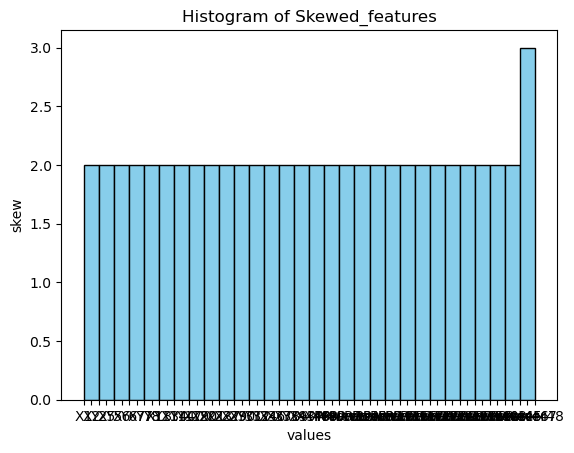

In [79]:
plt.hist(skewed_features,bins=30,color='skyblue',edgecolor='black')
plt.xlabel('values')
plt.ylabel('skew')
plt.title('Histogram of Skewed_features')

In [81]:
# aplly yeo johnson method

In [83]:
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
for feature in skewed_features:
    df_transformed[feature] = pt.fit_transform(df[[feature]])

C:\Users\anand\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\anand\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\anand\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [85]:
# correlation

In [87]:
correlation_matrix = df_transformed.corr()

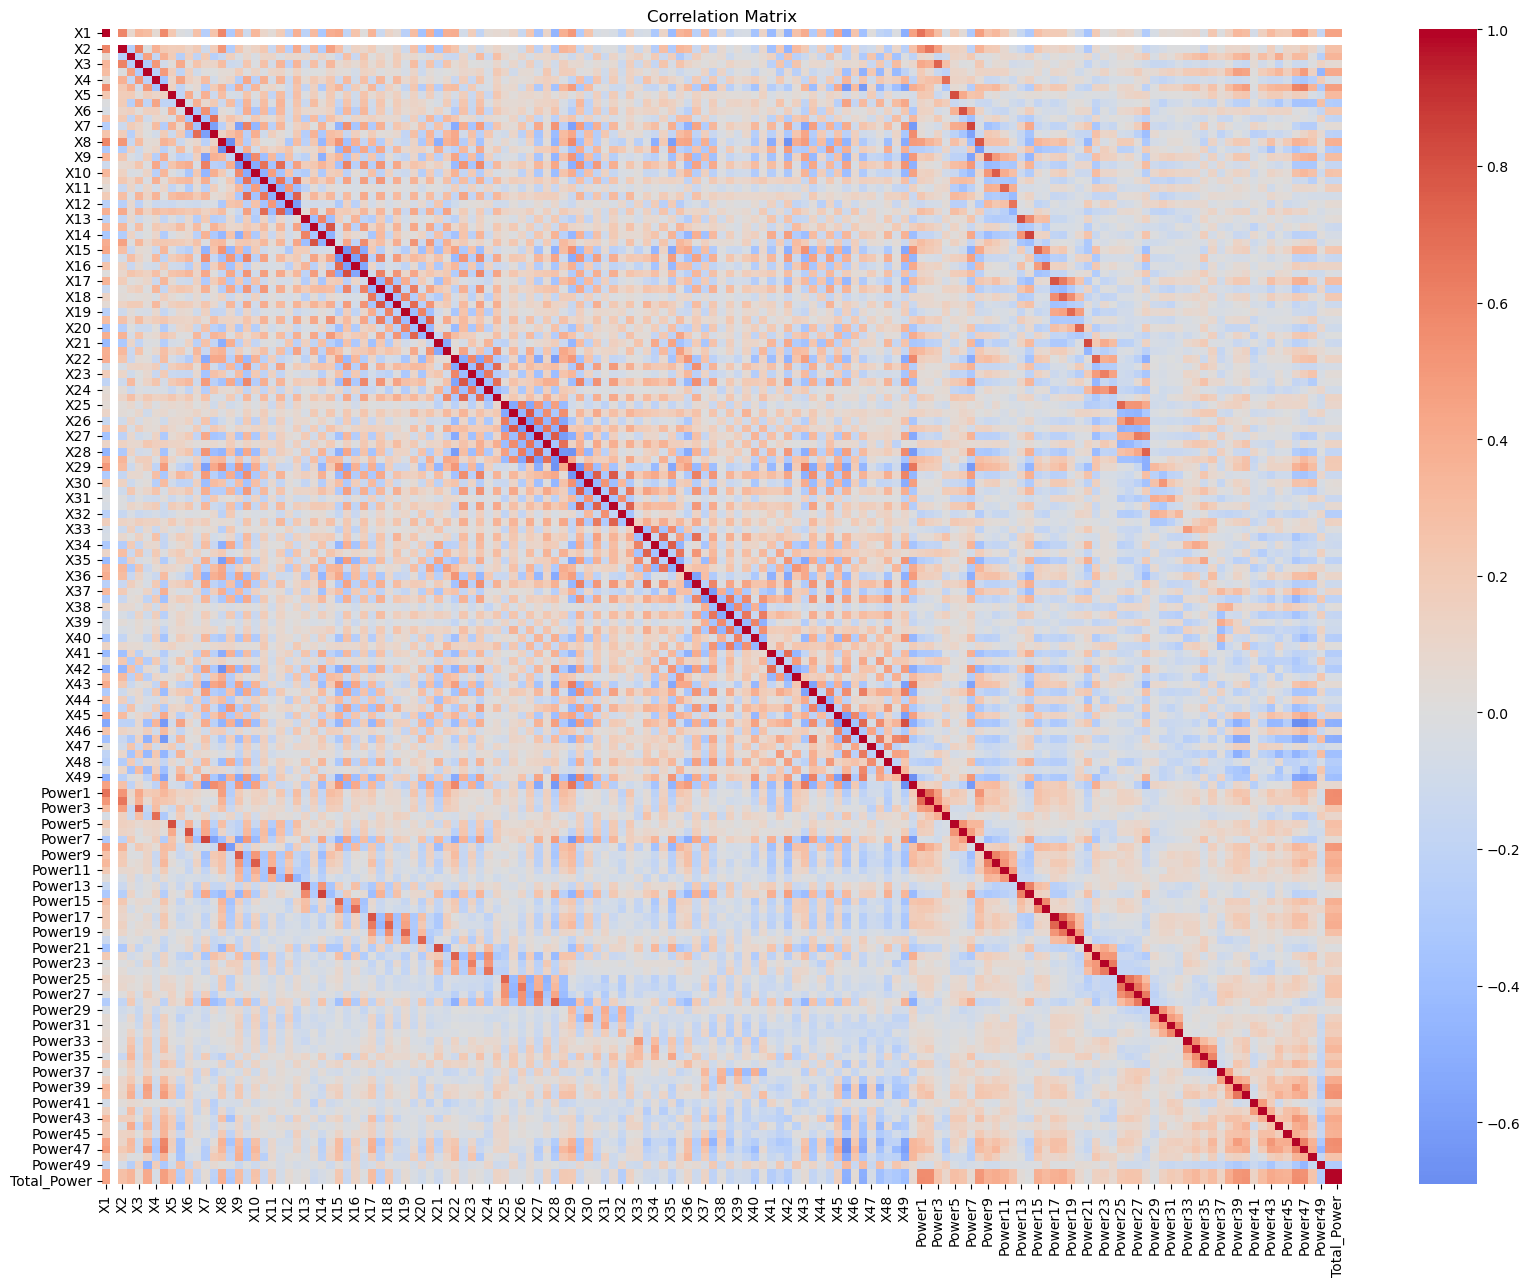

In [89]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [91]:
# feature selection 

In [97]:
from sklearn.decomposition import PCA

In [99]:
X = df_transformed.drop(['Total_Power', 'qW'], axis=1)  # Assuming these are targets
y = df_transformed['Total_Power']

In [323]:
selector = SelectKBest(score_func=f_regression, k=(20))
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [325]:
print("Selected Features:", selected_features.tolist())

Selected Features: ['X1', 'Y3', 'Y4', 'Y45', 'Y46', 'Y47', 'X49', 'Power1', 'Power2', 'Power8', 'Power10', 'Power15', 'Power18', 'Power38', 'Power39', 'Power40', 'Power43', 'Power44', 'Power46', 'Power47']


In [327]:
X_new = selector.fit_transform(X,y)

In [329]:
selected_features = X.columns[selector.get_support()]
feature_score=pd.DataFrame({'feature':X.columns,'Score':selector.scores_}).sort_values(by='Score',ascending=False)
print("selectd_features:",selected_features)
print("\nFeature Score:")
print(feature_score)

selectd_features: Index(['X1', 'Y3', 'Y4', 'Y45', 'Y46', 'Y47', 'X49', 'Power1', 'Power2',
       'Power8', 'Power10', 'Power15', 'Power18', 'Power38', 'Power39',
       'Power40', 'Power43', 'Power44', 'Power46', 'Power47'],
      dtype='object')

Feature Score:
     feature         Score
98    Power1  16890.105424
99    Power2  15960.381711
143  Power46  15780.935007
144  Power47  14754.037384
137  Power40  14330.592244
..       ...           ...
41       Y21      2.453717
45       Y23      0.713719
111  Power14      0.561119
39       Y20      0.048908
1         Y1      0.000000

[147 rows x 2 columns]


In [311]:
# scaling

In [331]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X_selected)

In [315]:
# Apply PCA

In [335]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [337]:
# Determine explained variance ratio

In [339]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)

Explained Variance Ratio: [0.37283128 0.10858393 0.06654655 0.05144426 0.04992025 0.04446701
 0.04426235 0.03812483 0.03271147 0.02891523 0.02793543 0.02551014
 0.02058142 0.01987522 0.01746375 0.01228163 0.01142089 0.01048402
 0.01006203 0.00657832]


In [341]:
X_pca= pca.transform(X_scaled)

In [343]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1,X_pca.shape[1] + 1)])

In [345]:
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.704394  0.618926  0.770656  0.077958  0.079566  1.638766  0.904064   
1 -3.705696  0.617227  0.801042  0.124559  0.053989  1.698827  0.935535   
2 -3.704491  0.616544  0.801435  0.120691  0.052405  1.698316  0.936415   
3 -3.713985  0.627450  0.795850  0.112328  0.067813  1.682687  0.919567   
4 -1.665378 -3.525299 -0.849459 -0.067692  0.843243  1.856487  2.207395   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.216709 -0.512812 -0.013424  0.149777  0.323202  0.354804 -0.020662   
1  1.206085 -0.532646 -0.001339  0.176345  0.365110  0.384203 -0.027038   
2  1.211103 -0.526195 -0.001288  0.179155  0.365127  0.376603 -0.027970   
3  1.203845 -0.518824  0.004337  0.174167  0.368629  0.380046 -0.023806   
4  1.128851  0.068320 -1.236196  0.685152 -0.077091  0.595658 -0.016511   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.243580 -0.171700  0.020163  0

In [273]:
# train test

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [277]:
X_test.shape

(7209, 20)

In [279]:
X_train.shape

(28834, 20)

In [281]:
y_train.shape

(28834,)

In [283]:
y_test.shape

(7209,)

In [285]:
print(f"""
X train shape = X_train.shape
X test shape = X_test.shape
Y train shape = y_train.shape
Y test shape = y_test.shape
""")


X train shape = X_train.shape
X test shape = X_test.shape
Y train shape = y_train.shape
Y test shape = y_test.shape



In [205]:
# model build

In [207]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

In [209]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

In [210]:
results_df = pd.DataFrame(results).T
print("\nInitial Model Performance:")
print(results_df)


Initial Model Performance:
                             MAE           MSE        R2
Linear Regression   44178.290003  3.376026e+09  0.770619
Decision Tree       11291.633596  1.209925e+09  0.917793
Random Forest        8574.013096  5.583729e+08  0.962062
Gradient Boosting   23224.616862  1.275748e+09  0.913321
SVR                101243.413917  1.423269e+10  0.032974


In [211]:
# hyper tuning

In [212]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [213]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, scoring='r2', n_jobs=-1)  
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [214]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\nBest Parameters:", best_params)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [215]:
y_pred_best = best_model.predict(X_test)
best_results = {
    'MAE': mean_absolute_error(y_test, y_pred_best),
    'MSE': mean_squared_error(y_test, y_pred_best),
    'R2': r2_score(y_test, y_pred_best)
}

In [216]:
print("\nBest Model Performance:")
print(pd.DataFrame([best_results], index=['Random Forest (Tuned)']))


Best Model Performance:
                               MAE           MSE        R2
Random Forest (Tuned)  8527.284231  5.533460e+08  0.962403


In [221]:
feature_importance = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
    Feature  Importance
4       Y46    0.285471
8    Power2    0.244660
3       Y45    0.130662
7    Power1    0.064007
10  Power10    0.052481
9    Power8    0.034589
15  Power40    0.032974
16  Power43    0.027744
11  Power15    0.020511
12  Power18    0.020466
13  Power38    0.015209
18  Power46    0.012814
19  Power47    0.010910
0        X1    0.010442
14  Power39    0.009614
17  Power44    0.006525
6       X49    0.006211
1        Y3    0.005500
2        Y4    0.005238
5       Y47    0.003971


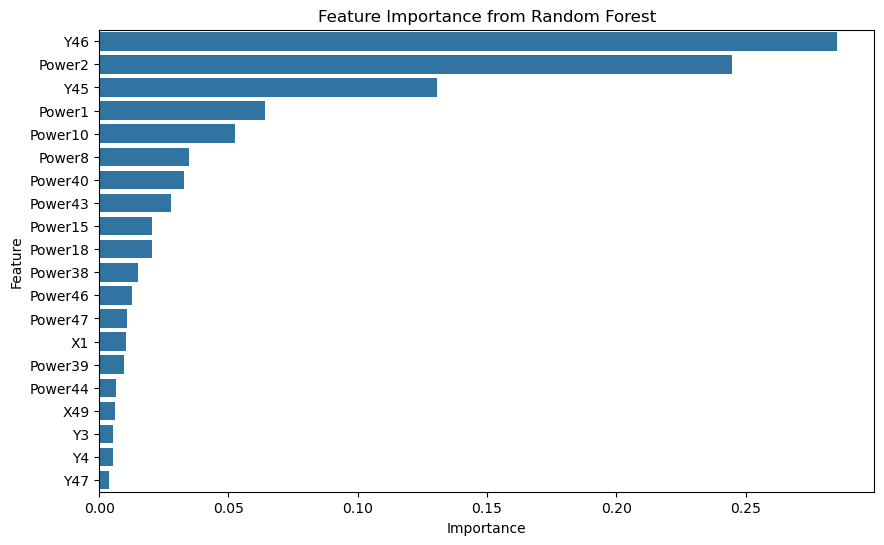

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [223]:
# checking over fitting
from sklearn.model_selection import cross_val_score

In [224]:
model = RandomForestRegressor()

In [225]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [226]:
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean CV R2 score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

Cross-validation R2 scores: [0.95490086 0.95411761 0.94861435 0.95510122 0.95660087]
Mean CV R2 score: 0.9538669807535728
Standard deviation: 0.0027466103323513353


In [227]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print(f"Training R2 score: {train_score}")

Training R2 score: 0.9939934208295169


In [228]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import joblib

In [229]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SelectKBest(score_func=f_regression, k=20)),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [230]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selector',
                 SelectKBest(k=20,
                             score_func=<function f_regression at 0x0000019E399C2480>)),
                ('regressor', RandomForestRegressor(random_state=42))])

In [231]:
joblib.dump(pipeline, 'wave_energy_pipeline.joblib')

['wave_energy_pipeline.joblib']

In [347]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Training R2: {train_score}")
print(f"Test R2: {test_score}")

Training R2: 0.994004302928592
Test R2: 0.9620322282709919


In [349]:
pipeline = joblib.load('wave_energy_pipeline.joblib')

In [361]:
data = pd.read_csv('Unseen wave.csv')

In [363]:
unseen_data = pd.DataFrame(data)

In [365]:
unseen_data.head()

,X1,Y3,Y4,Y45,Y46,Y47,X49,Power1,Power2,Power8,Power10,Power15,Power18,Power38,Power39,Power40,Power43,Power46,Power47,qW
0,600,74.88,112.05,800,837.50,874.88,0,71265.25,77995.25,72878.46,77099.61,101433.80,61966.02,101500.92,101599.89,99552.24,98844.30,101624.58,100915.03,0.87
1,593,74.88,112.05,800,837.50,874.88,0,72871.68,76893.17,72970.56,77055.08,101586.31,61220.26,101566.70,101557.24,99569.69,98759.79,101629.01,100934.53,0.87
2,593,74.88,112.05,800,837.50,874.88,0,72724.29,76995.80,72987.39,77062.81,101597.84,61229.45,101582.13,101533.50,99595.29,98746.68,101618.32,100941.00,0.87
3,593,74.88,112.05,800,837.50,874.88,0,72759.25,77036.33,73220.73,76983.41,101629.75,61468.66,101616.64,101538.14,99574.88,98760.96,101632.28,100943.59,0.87
4,200,74.93,112.18,800,837.53,874.93,0,44620.44,45945.24,53794.42,79860.68,99587.02,55400.66,101723.82,101303.05,99115.92,98630.24,101064.48,100948.38,0.79


In [367]:
predictions = pipeline.predict(unseen_data)
print(f"Predictions on unseen data: {predictions}")

Predictions on unseen data: [3931303.8859 3931303.8859 3931303.8859 3931303.8859 3931494.864
 3931494.864  3931494.864  3931299.8884 3931299.8884 3931303.8859
 3931303.8859 3931303.8859 3931303.8859 3931303.8859 3931303.8859
 3931303.8859 3894235.6815 3898183.2407 3894112.847 ]


C:\Users\anand\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [369]:
unseen_data['Predicted_Power'] = predictions
unseen_data.to_csv('unseen_data_predictions.csv', index=False)

In [371]:
unseen_data.head()

,X1,Y3,Y4,Y45,Y46,Y47,X49,Power1,Power2,Power8,...,Power15,Power18,Power38,Power39,Power40,Power43,Power46,Power47,qW,Predicted_Power
0,600,74.88,112.05,800,837.50,874.88,0,71265.25,77995.25,72878.46,...,101433.80,61966.02,101500.92,101599.89,99552.24,98844.30,101624.58,100915.03,0.87,3.931304e+06
1,593,74.88,112.05,800,837.50,874.88,0,72871.68,76893.17,72970.56,...,101586.31,61220.26,101566.70,101557.24,99569.69,98759.79,101629.01,100934.53,0.87,3.931304e+06
2,593,74.88,112.05,800,837.50,874.88,0,72724.29,76995.80,72987.39,...,101597.84,61229.45,101582.13,101533.50,99595.29,98746.68,101618.32,100941.00,0.87,3.931304e+06
3,593,74.88,112.05,800,837.50,874.88,0,72759.25,77036.33,73220.73,...,101629.75,61468.66,101616.64,101538.14,99574.88,98760.96,101632.28,100943.59,0.87,3.931304e+06
4,200,74.93,112.18,800,837.53,874.93,0,44620.44,45945.24,53794.42,...,99587.02,55400.66,101723.82,101303.05,99115.92,98630.24,101064.48,100948.38,0.79,3.931495e+06



Conclusion:
          In conclusion, this study highlights the potential of wave energy as a sustainable power source and addresses the challenge of optimizing energy output in large-scale farms. By developing a surrogate model, we can reduce computational costs while maintaining accuracy in predicting energy generation. The findings contribute to advancing renewable energy solutions, supporting global efforts toward mitigating climate change.